<a href="https://colab.research.google.com/github/carloslizarragac/FisicaComputacional1/blob/master/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Solución Numérica de la Ecuación del Calor

La ecuación del calor es de la forma

\begin{equation*}
\frac{\partial u}{\partial t} = \kappa \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} +
\frac{\partial^2 u}{\partial z^2} \right)
\end{equation*}

donde la constante $\kappa$ es el coefficiente de difusividad. 

La Ecuación del Calor describe el flujo de calor en una región mediante los cambios de la Temperatura $u(x,t)$.

En un medio unidimensional $x$, la ecuación se simplifica 

\begin{equation*}
\frac{\partial u}{\partial t} = \kappa \left( \frac{\partial^2 u}{\partial x^2}
\right)
\end{equation*}



### Resolviendo la Ecuación de Calor mediante Diferencias Finitas.

El **método de diferencias finitas** utiliza Series de Taylor para aproximar las derivadas.

**Aproximación de la primer derivada.**

Si se conoce el valor de una función $f(x)$ en un punto $x_0$, se puede conocer el valor en una vecindad $x_0 + h$, con $h$ pequeño, utilzando una Serie de Taylor

\begin{equation*}
f(x_0+h) \approx f(x_0) + \frac{h}{1!}f'(x_0) +  \mathcal{O}(h^2)
\end{equation*}

de la ecuación anterior, obtenemos el valor aproximado de la primer derivada

\begin{equation*}
f'(x_0) \approx \frac{f(x_0 +h) - f(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}

El término $\mathcal{O}(h^2)$ denota términos de orden $h^2$ y superior. 

Esta aproximación de la primera derivada, se le conoce como *diferencias finitas de* $f'(x_0)$ *hacia enfrente*, porque involucra un punto hacia enfrente en la derivada.

De la misma forma se obtiene el término de diferencias finitas hacia atrás

\begin{equation*}
f'(x_0) \approx \frac{f(x_0) - f(x_0-h)}{h} + \mathcal{O}(h^2)
\end{equation*}

Podemos promediar las dos ecuaciones anteriores y se obtiene una *diferencia finita centrada* de orden superior

\begin{equation*}
f'(x_0) \approx \frac{f(x_0 +h) - f(x_0 -h)}{2h} + \mathcal{O}(h^3)
\end{equation*}

**Aproximación de la segunda derivada**

Podemos utilizar esta última ecuación para calcular la aproximación de la segunda derivada

\begin{equation*}
f''(x_0) \approx \frac{f'(x_0 +h) - f'(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}

y substituimos $f(x_0 + h)$ por una *diferencia finita hacia atrás*

\begin{equation*}
f'(x_0 +h) \approx \frac{f(x_0 +h) - f(x_0)}{h} + \mathcal{O}(h^2)
\end{equation*}

y la derivada $f'(x_0)$ por una *diferencia finita hacia atrás* 

\begin{equation*}
f'(x_0) \approx \frac{f(x_0) - f(x_0 -h)}{h} + \mathcal{O}(h^2)
\end{equation*}

Finalmente obtenemos la *diferencia finita centrada de segundo orden* para $f''(x_0)$ que involucra los valores en 3 puntos. 

\begin{equation*}
f''(x_0) \approx \frac{f(x_0 +h) - 2 f(x_0) + f(x_0 -h)}{h^2} + \mathcal{O}(h^3)
\end{equation*}



**Solución de la Ecuación de Calor por un método híbrido**. 

Podemos escribir la ecuación del calor como

\begin{eqnarray*}
\frac{\partial u(x,t)}{\partial t} & = & \kappa \frac{\partial^2 u(x,t)}{\partial x^2} \\
 & \approx & \kappa \frac{u(x+h,t) - 2 u(x,t) + u(x-h,t)}{h^2} 
\end{eqnarray*}

y luego integrar en el tiempo como si tuviéramos una ecuación diferencial ordinaria.

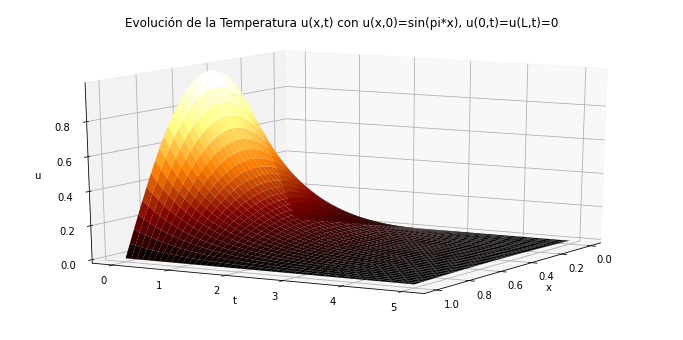

In [1]:
# Solución de la Ecuación del Calor usando scipy.integrate.odeint
# Problema de Valor Inicial y Condiciones a la Frontera Tipo de Dirichlet

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos la expresión de diferencias finitas centradas de segundo orden
def odefunc(u, t):
    # Llenamos de ceros inicialmente
    dudt = np.zeros(x0.shape)

    # Condiciones a la Frontera Tipo Dirichlet: Temperatura constante
    # Condiciones a la frontera u(0,t)=u(L,t)=0 
    dudt[0] = 0
    dudt[-1] = 0 # Equivale a evaluar en el último punto N

    # Constante de difusión del calor
    kappa=0.1
    
    # Calculamos la temperatura en los puntos interiores 1 a N-1.
    for i in range(1, N-1):
        dudt[i] = kappa*(u[i + 1] - 2*u[i] + u[i - 1]) / h**2
    return dudt

# Algunos parámetros
# Intervalo en x = (a,b)
a = 0
b = 1
# Tiempo inicial y final
t0 = 0
tf = 5.0

# Número de puntos en la dirección x
N = 40
# Tamaño de delta x
h = (b-a)/(N-1)

# Contantes de diferencias finitas
#k = 0.25*h**2
#r = k/h**2;

# Los puntos en el dominio x
x = np.linspace(a, b, N);

# La condición inicial u(x,0)=sin(pi*x)
x0 = np.sin(np.pi*x)
x0[x0 < 0] = 0

# Puntos de integración en el tiempo
tspan = np.linspace(t0, tf, 50);

# Solución usando scipy.integrate.odeint
sol = odeint(odefunc, x0, tspan)

#%% Make a 3d figure
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(x, tspan)
# Ver mapa de colores de Matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
ax.plot_surface(SX, ST, sol, cmap='afmhot', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.view_init(elev=15, azim=30)
ax.set_title('Evolución de la Temperatura u(x,t) con u(x,0)=sin(pi*x), u(0,t)=u(L,t)=0')
plt.show()


**Ejercicio 1:**

Resuelva la Ecuación del calor, usando el método anterior para el siguiente caso:

**Caso a)** 

Una barra metálica de longitud $L=10$, y coeficiente de difusión $\kappa=100$.
Condición inicial (Temperatura dentro de la barra): u(x,0) = 0.

Condiciones a la frontera: u(0,t)=10, u(L,t)=0.

Realice los cálculos hasta alcanzar el equilibrio térmico.

**Caso b)** 

Un material de longitud $L=10$ con coeficiente de difusión térmica $\kappa=0.25$

Condición inicial u(x,0)=20.

Condiciones a la frontera: u(0,t)=(20 + 10 sin(pi*t/12), u(L,t)=20.

Realice los cálculos para t=(0,48)

Pueden ajustar los parámetros para ver cómo cambia la temperatura dentro del cuerpo.


**Aproximación Ecuación de Calor por el método de diferencias finitas**

Un método para resolver la Ecuación del Calor es usar diferencias finitas hacia enfrente en el tiempo y diferencias finitas centradas en el espacio.

Discretizamos el espacio-tiempo, mediante una malla: 
* Definimos n puntos entre x=0 y x=L, separados una distancia $\Delta x$.
* Definimos m puntos entre t=0 y t, separados en lapsos de tiempo $\Delta t$.

Supodremos que el incremento en el tiempo es $k=\Delta t$ y en el espacio $h=\Delta x$. La Ecuación del Calor es


\begin{equation*}
\frac{u(x,t+k) - u(x,t)}{k} = 
\frac{u(x+h,t) - 2 u(x,t) + u(x-h,t)}{h^2} + \mathcal{O}(h^3,k^2)
\end{equation*}

donde error de aproximación es de orden $\mathcal{O}(h^3,k^2)$

Si denotamos la temperatura en el punto $(x,t) = (jh,nk)$, por $u(x_j, t_n$) = $u_j^n$, la ecuación anterior se puede representar geométricamente por la "molécula computacional"

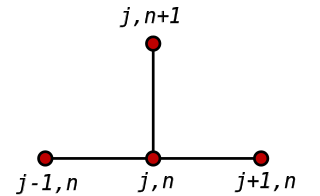

**Implementando el método de diferencias finitas**

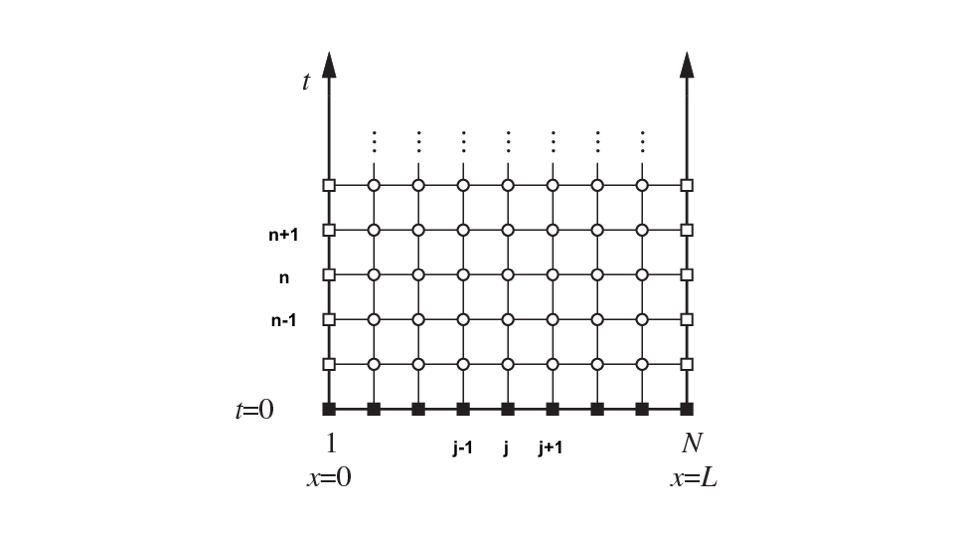

Si conocemos la condición inicial $u(x,0)=f(x)$ y las condiciones a la frontera $u(0,t), u(L,t)$ podemos calcular sin problema el valor desconocido de la temperatura en el tiempo $t=k$, $u(x,k)$. Una vez hecho lo anterior, podremos conocer la temperatura al tiempo $t=2k$, $u(x,2k)$ y así sucesivamente. 



Despejamos la ecuación anterior para el valor desconocido $u(x,t+k)$, resultando

\begin{eqnarray*}
u(x,t+k) & = & u(x,t) + \frac{k}{h^2} 
\left( u(x+h,t) - 2 u(x,t) + u(x-h,t) \right) \\
         & = & r u(x+h,t) + (1 -2r) u(x,t) + r u(x-h,t)
\end{eqnarray*}

donde $r=\frac{k}{h^2}$.

**NOTA IMPORTANTE:** El método de diferencias finitas anterior para resolver la Ecuación del Calor es **estable y convergente si y sólo si $r \leq 1/2$**. 